# Budget Analysis

---

## Environment Setup

In [13]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [14]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [15]:
# Set environment variables from the .env file
load_dotenv()

Python-dotenv could not parse statement starting at line 4
Python-dotenv could not parse statement starting at line 5


True

In [16]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [17]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
print(client)

In [18]:
# Set the institution id
os.getenv('PLAID_PUBLIC_KEY')

'fddc4552d03ef0f734ab2c021eee26'

### 2. Generate a public token

In [19]:
# Create the public token
INSITUTION_ID = "ins_109508"

# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [20]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
# Print the access toke
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [21]:
# Retrieve accounts
client.Accounts.get(access_token)
# Print accounts


{'accounts': [{'account_id': '6EopLG6WmVSMxorM3GLRhPzVoNgZyzFgP6MGR',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'XWzxQAGn1mIargnalkNPSzADVaZpqAFdvQzyW',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'DDxJ4kqaRNfojLBo5nZ7SM14arGKj1fvL19ng',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [22]:
# Set the start and end date 90 days from today
start_date =  '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token,start_date,end_date)
# Print the transactions
trans_list = json.dumps(transaction_response['transactions'],indent=4,sort_keys=True)
print(trans_list)

[
    {
        "account_id": "XWzxQAGn1mIargnalkNPSzADVaZpqAFdvQzyW",
        "account_owner": null,
        "amount": 25,
        "authorized_date": null,
        "category": [
            "Payment",
            "Credit Card"
        ],
        "category_id": "16001000",
        "date": "2020-07-14",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": null,
        "name": "CREDIT CARD 3333 PAYMENT *//",
        "payment_channel": "other",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
   

### 2. Print the categories for each transaction

In [23]:
# Create a for-loop to print the categories for each transaction
transactions = transaction_response['transactions']
all_categories =[]
for transaction in transactions:
    print(transaction["category"])

['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [35]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
#setting each columns for each column name
trans_df = pd.DataFrame(columns=["Date", "Name", "Amount", "Category"])
dates, names, amounts, cats = [],[],[],[]
for transaction in transactions:
    dates.append(transaction["date"])
    names.append(transaction["name"])
    amounts.append(float(transaction["amount"]))
    cats.append(transaction["category"][0])
trans_df["Date"] = dates
trans_df["Name"] = names
trans_df["Amount"] = amounts
trans_df["Category"] = cats
trans_df.tail()
# Display sample data from the DataFrame    


,Date,Name,Amount,Category
13,2020-06-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
14,2020-06-23,KFC,500.0,Food and Drink
15,2020-06-23,Madison Bicycle Shop,500.0,Shops
16,2020-06-14,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
17,2020-06-14,Uber 063015 SF**POOL**,5.4,Travel


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [37]:
# Display data types
trans_df.set_index(pd.DatetimeIndex(trans_df['Date']), inplace = True)
trans_df.head()

,Date,Name,Amount,Category
Date,,,,
2020-07-14,2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
2020-07-14,2020-07-14,Uber 063015 SF**POOL**,5.4,Travel
2020-07-13,2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
2020-07-13,2020-07-13,CD DEPOSIT .INITIAL.,1000.0,Transfer
2020-07-12,2020-07-12,Touchstone Climbing,78.5,Recreation


In [38]:
# Make any required data type transformation
trans_df.drop(columns=['Date'], inplace=True)
trans_df.head()

,Name,Amount,Category
Date,,,
2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
2020-07-14,Uber 063015 SF**POOL**,5.4,Travel
2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
2020-07-13,CD DEPOSIT .INITIAL.,1000.0,Transfer
2020-07-12,Touchstone Climbing,78.5,Recreation


In [ ]:
# Set the date column as index

# Display sample data


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [39]:
# Fetch de income data
income_response = client.Income.get(access_token)

# Print the income data
print(income_response['income'])

{'income_streams': [{'confidence': 0.99, 'days': 720, 'monthly_income': 500, 'name': 'UNITED AIRLINES'}], 'last_year_income': 6500, 'last_year_income_before_tax': 7893, 'max_number_of_overlapping_income_streams': 1, 'number_of_income_streams': 1, 'projected_yearly_income': 6085, 'projected_yearly_income_before_tax': 7389}


In [40]:
# Determine the previous year's gross income and print the results
last_year = income_response["income"]["last_year_income_before_tax"]
last_year

7893

In [43]:
# Determine the current monthly income and print the results
monthly_income = income_response['income']['income_streams'][0]['monthly_income']
monthly_income

500

In [44]:
# Determine the projected yearly income and print the results
yearly_income = income_response['income']['projected_yearly_income']
yearly_income

6085

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [46]:
# Compute the total expenses per category
expense_by_category = trans_df.groupby('Category').sum()
# Display the expenses per catefory
expense_by_category

,Amount
Category,
Food and Drink,1105.73
Payment,2128.50
Recreation,78.50
Shops,500.00
Transfer,6845.78
Travel,17.13


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4254a5c10>],
      dtype=object)

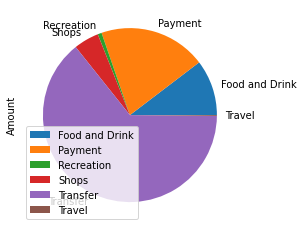

In [49]:
# Create a spending categories pie chart.
expense_by_category.plot(kind="pie", subplots=True)

### Calculate the expenses per month

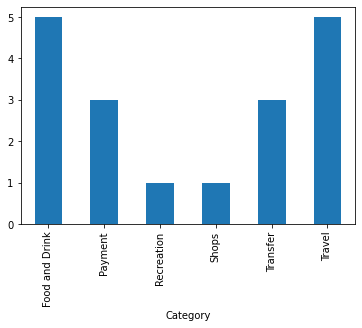

In [53]:
# Create a DataFrame with the total expenses
trans_month = trans_df.groupby('Category').count()
trans_month['Amount'].plot(kind='bar')
# Display sample data
